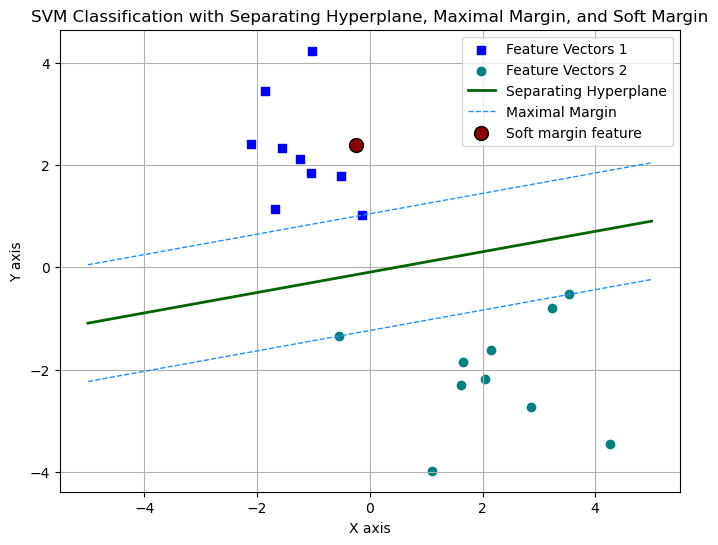

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate random data for two clusters
np.random.seed(0)
X1 = np.random.randn(10, 2) + [-2, 2]
X2 = np.random.randn(10, 2) + [2, -2]
X = np.vstack((X1, X2))
y = np.hstack((np.ones(10), -np.ones(10)))

# Fit SVM model with a linear kernel
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Calculate the margin boundaries
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0], X1[:, 1], color="blue", marker="s", label="Feature Vectors 1")
plt.scatter(X2[:, 0], X2[:, 1], color="teal", marker="o", label="Feature Vectors 2")

# Plot the separating hyperplane and margins
plt.plot(xx, yy, 'darkgreen', linestyle='-', linewidth=2, label="Separating Hyperplane")
plt.plot(xx, yy_down, 'dodgerblue', linestyle='--', linewidth=1, label="Maximal Margin")
plt.plot(xx, yy_up, 'dodgerblue', linestyle='--', linewidth=1)

# Mark a soft margin point
plt.scatter(X[0, 0], X[0, 1], color="darkred", edgecolor="black", s=100, label="Soft margin feature")

# Labeling
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(loc="upper right")
plt.title("SVM Classification with Separating Hyperplane, Maximal Margin, and Soft Margin")

# Show plot
plt.grid(True)
plt.show()


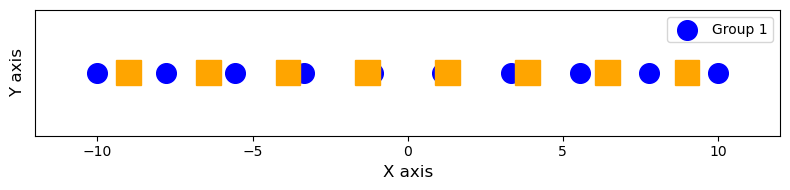

In [2]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(8, 2))

# Define x positions for the two groups along the x-axis
group1_x = np.linspace(-10, 10, 10)  # Positions for Group 1
group2_x = np.linspace(-9, 9, 8)    # Positions for Group 2 (interleaved)

# Define y positions (all on the same line, y=0)
y_values = np.zeros_like(group1_x)

# Plot Group 1 (e.g., circles in blue)
ax.scatter(group1_x, y_values[:len(group1_x)], color="blue", s=200, label="Group 1")

# Plot Group 2 (e.g., squares in orange) interleaved with Group 1
for x in group2_x:
    rect = plt.Rectangle((x - 0.4, -0.2), 0.8, 0.4, color="orange", zorder=1)
    ax.add_patch(rect)

# Label the x-axis
ax.set_xlabel("X axis", fontsize=12)
ax.set_ylabel("Y axis", fontsize=12)

# Set limits and hide the y-ticks
ax.set_xlim(-12, 12)
ax.set_ylim(-1, 1)
ax.set_yticks([])

# Display gridlines for clarity and adjust layout
ax.legend()
ax.grid(False)
plt.tight_layout()
plt.show()


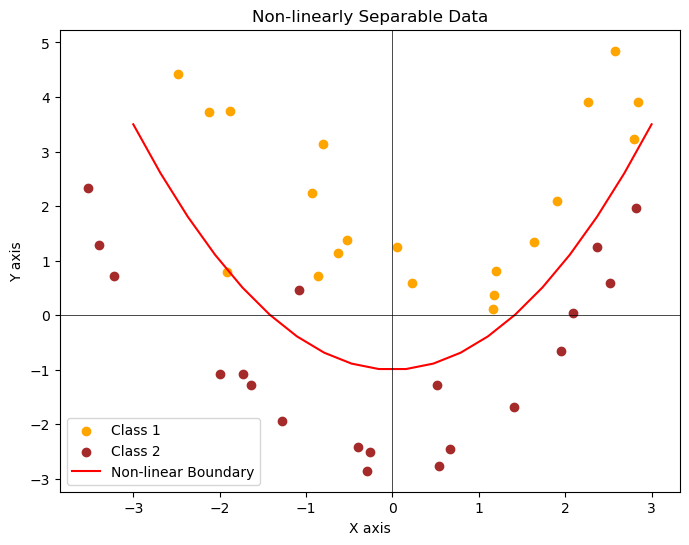

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some non-linearly separable data
np.random.seed(0)
x = np.linspace(-3, 3, 20)
y = 0.5 * x**2 - 1  # Parabolic boundary

# Add some data points above and below the curve for two classes
x1 = x + np.random.normal(0, 0.5, x.shape)
y1 = y + np.random.normal(1.5, 0.5, y.shape)

x2 = x + np.random.normal(0, 0.5, x.shape)
y2 = y - np.random.normal(1.5, 0.5, y.shape)

# Plotting the original non-linearly separable data
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, color='orange', label="Class 1")
plt.scatter(x2, y2, color='brown', label="Class 2")
plt.plot(x, y, color='red', linestyle='-', label="Non-linear Boundary")

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend()
plt.title("Non-linearly Separable Data")

plt.show()


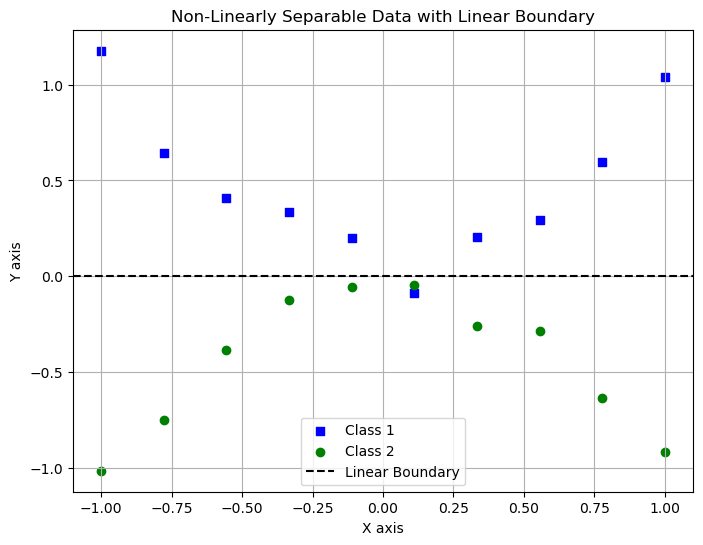

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two sets of points for two classes that are not linearly separable
np.random.seed(0)
x1 = np.linspace(-1, 1, 10)
y1 = x1**2 + 0.1 * np.random.randn(10)  # Quadratic relationship with noise

x2 = np.linspace(-1, 1, 10)
y2 = -(x2**2) - 0.1 * np.random.randn(10)  # Inverted quadratic relationship with noise

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, color='blue', marker='s', label='Class 1')
plt.scatter(x2, y2, color='green', marker='o', label='Class 2')

# Plot a linear decision boundary (horizontal line)
plt.axhline(0, color='black', linestyle='--', label='Linear Boundary')

# Labels and legend
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Non-Linearly Separable Data with Linear Boundary")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


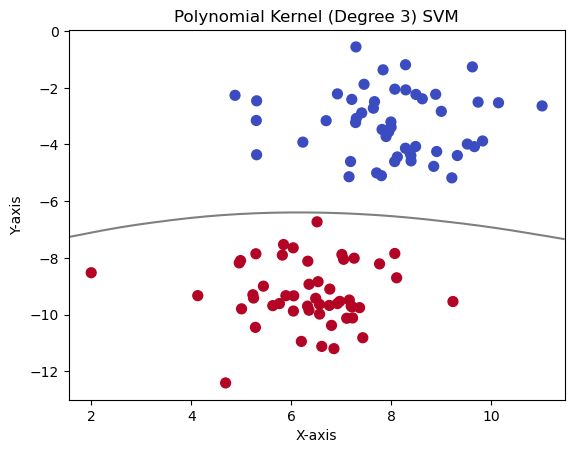

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generate linearly separable data
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# Train linear SVM
model = SVC(kernel="linear", C=1.0)
model.fit(X, y)

# Plot data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.title("Linear Kernel SVM")
plt.show()


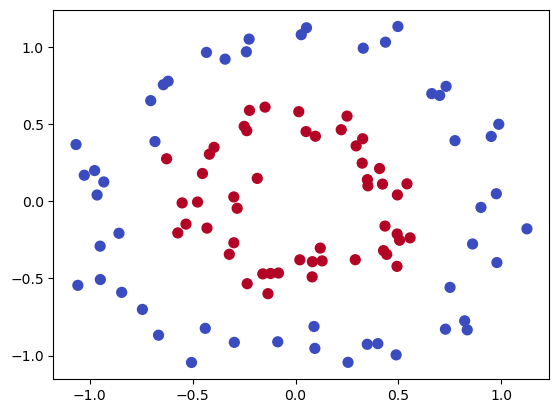

In [14]:
from sklearn.datasets import make_circles

# Generate circular data
X, y = make_circles(n_samples=100, factor=.5, noise=.1)

# Train RBF SVM
model = SVC(kernel="rbf", gamma=0.5)
model.fit(X, y)

# Plot decision boundary with data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)


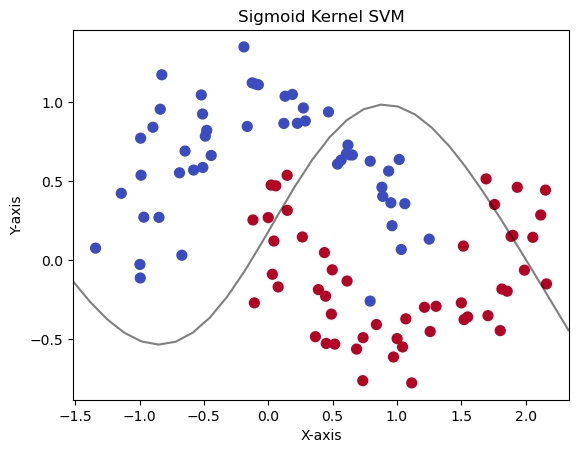

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

# Generate S-shaped data
X, y = make_moons(n_samples=100, noise=0.15, random_state=6)

# Train Sigmoid Kernel SVM
sigmoid_model = SVC(kernel="sigmoid", gamma=0.5, C=1.0)
sigmoid_model.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = sigmoid_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.title("Sigmoid Kernel SVM")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


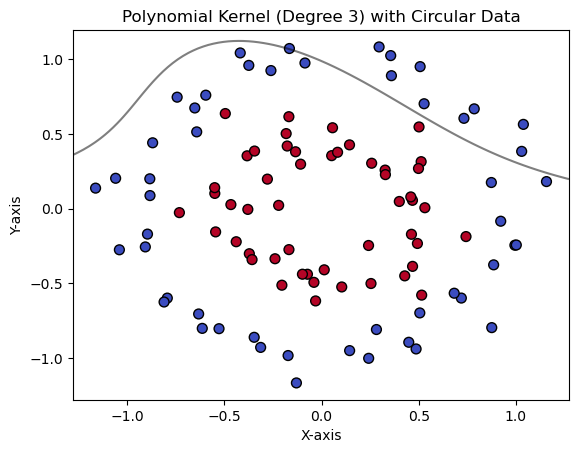

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Generate circular data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

# Train Polynomial Kernel SVM
poly_model = SVC(kernel="poly", degree=3, C=1.0)
poly_model.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors="k")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = poly_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
plt.title("Polynomial Kernel (Degree 3) with Circular Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
